In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
#Eye risk 
f = 40 #Hz #Pulsed light frequency 
T = 1/f 
alpha = 0.5 #Duty cycle 
P= 5*60 #Exposure time 
N = P / T
t = N*T*alpha #real exposure time : only high-state is considered
E_max = 18000/(t**0.75) #Based on the europeen norm : Risks related to the eyes exposure 
print('The maximum tolerated energy is =  ', E_max , ' W/m2 ')

The maximum tolerated energy is =   419.95626138967  W/m2 


In [34]:
import math
wavelength = 810 #nm 
LED_radiant_power = 1#W  
def intensity(distance):
    return intensity_at_source / ( distance ** 2)
def Number_of_LEDs (LED_radiant_power,E_max,surface): 
    return math.ceil(E_max*surface/LED_radiant_power)

In [35]:
surface_top = 1.1*0.82 
surface_sides = 1.1*0.72
surface_back= 0.72*0.82

In [36]:
print('max sides',Number_of_LEDs (LED_radiant_power,E_max,surface_sides))
print('max top',Number_of_LEDs (LED_radiant_power,E_max,surface_top))
print('max back',Number_of_LEDs (LED_radiant_power,E_max,surface_back))

max sides 333
max top 379
max back 248


In [37]:
max_side = Number_of_LEDs (LED_radiant_power,E_max,surface_sides)
max_top = Number_of_LEDs (LED_radiant_power,E_max,surface_top)
max_back = Number_of_LEDs (LED_radiant_power,E_max,surface_back)

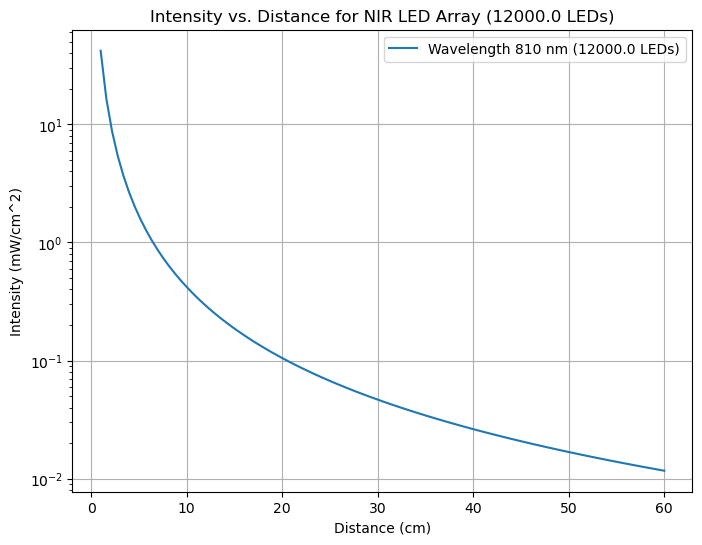

In [38]:
#Top panel 
intensity_at_source = LED_radiant_power*1000*max_top/(surface_top*100*100)
# Define a range of distances to study
distances = np.linspace(1, 60, 100)
def intensity(distance):
    return intensity_at_source / ( distance **2 )
intensities = [intensity(d) for d in distances]
plt.figure(figsize=(8, 6))
plt.plot(distances, intensities, label=f'Wavelength {wavelength} nm ({N} LEDs)')
plt.xlabel("Distance (cm)")
plt.ylabel("Intensity (mW/cm^2)")
plt.title(f"Intensity vs. Distance for NIR LED Array ({N} LEDs)")
plt.legend()
plt.grid()
plt.yscale("log")  # Use a logarithmic scale for better visualization
plt.show()

In [39]:
intensity(10)

0.42017738359201773

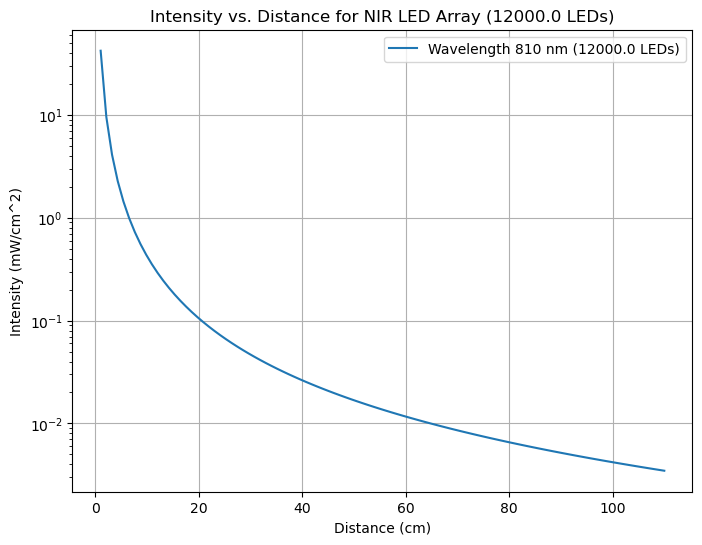

In [40]:
#Back panel 
intensity_at_source = LED_radiant_power*1000*max_back/(surface_back*100*100)
# Define a range of distances to study
distances = np.linspace(1, 110, 100)
def intensity(distance):
    return intensity_at_source / (distance ** 2)
intensities = [intensity(d) for d in distances]
plt.figure(figsize=(8, 6))
plt.plot(distances, intensities, label=f'Wavelength {wavelength} nm ({N} LEDs)')
plt.xlabel("Distance (cm)")
plt.ylabel("Intensity (mW/cm^2)")
plt.title(f"Intensity vs. Distance for NIR LED Array ({N} LEDs)")
plt.legend()
plt.grid()
plt.yscale("log")  # Use a logarithmic scale for better visualization
plt.show()

In [41]:
intensity(10)

0.4200542005420055

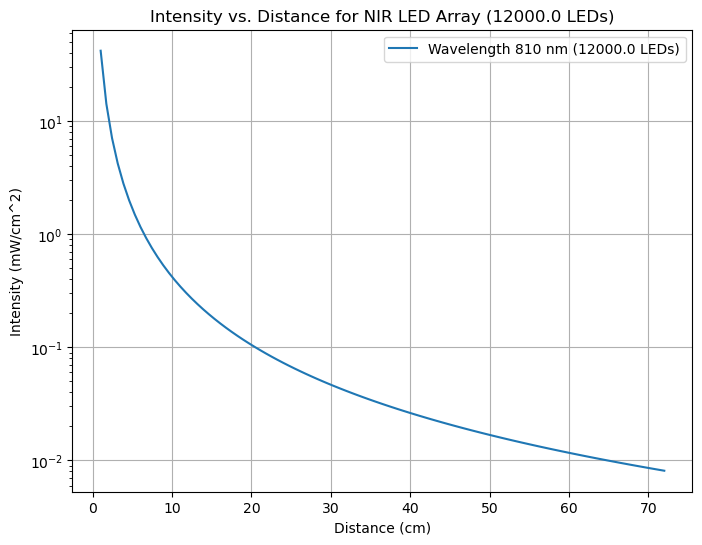

In [43]:
#Side panel 
intensity_at_source = LED_radiant_power*1000*max_side/(surface_sides*100*100)
# Define a range of distances to study
distances = np.linspace(1, 72, 100)
def intensity(distance):
    return intensity_at_source / ( distance ** 2)
intensities = [intensity(d) for d in distances]
plt.figure(figsize=(8, 6))
plt.plot(distances, intensities, label=f'Wavelength {wavelength} nm ({N} LEDs)')
plt.xlabel("Distance (cm)")
plt.ylabel("Intensity (mW/cm^2)")
plt.title(f"Intensity vs. Distance for NIR LED Array ({N} LEDs)")
plt.legend()
plt.grid()
plt.yscale("log")  # Use a logarithmic scale for better visualization
plt.show()

In [44]:
intensity(10)

0.42045454545454547

In [45]:
#Planar light source 
N = max_top*2/3 #Number of LEDs
S = 1.1*0.82 #Top surface in m2 
d = 0.5 #Approximate distance between the head and the top panel if the monkey is laying down
Radiant_Flux = LED_radiant_power*N
theta = 0
S_luffy=0.15*0.5 #m2
Irradiance = Radiant_Flux*np.cos(theta) / (np.pi * S * d**2) 
Intensity_received_by_luffy_t = Irradiance*S_luffy #Approximation of the intensity received by the head

In [46]:
print('Intensity_received_by_luffy =',Intensity_received_by_luffy_t,'in W/m2')

Intensity_received_by_luffy = 26.749323029635622 in W/m2


In [47]:
#Planar light source 
N = max_back*2/3 #Number of LEDs
S = 0.72*0.82 #Top surface in m2 
d = 0.3 #Approximate distance between the head and the back panel if the monkey is laying down
Radiant_Flux = LED_radiant_power*N
theta =0
S_luffy=0.5*0.15 #m2
Irradiance = Radiant_Flux*np.cos(theta) / (np.pi * S * d**2) 
Intensity_received_by_luffy_b = Irradiance*S_luffy #Approximation of the intensity received by the head

In [48]:
print('Intensity_received_by_luffy =',Intensity_received_by_luffy_b,'in W/m2')

Intensity_received_by_luffy = 74.2818915364161 in W/m2


In [49]:
#Planar light source 
N = max_side*2/3 #Number of LEDs
S = 0.72*1.1 #Top surface in m2 
d = 0.2 #Approximate distance between the head and the side panel if the monkey is laying down
Radiant_Flux = LED_radiant_power*N
theta = 0 
S_luffy=0.15*0.5 #m2
Irradiance = Radiant_Flux*np.cos(theta) / (np.pi * S * d**2) 
Intensity_received_by_luffy_s = Irradiance*S_luffy #Approximation of the intensity received by the head

In [50]:
print('Intensity_received_by_luffy =',Intensity_received_by_luffy_s,'in W/m2')

Intensity_received_by_luffy = 167.2935481363672 in W/m2


In [51]:
total_received_intensity= 2*Intensity_received_by_luffy_s + Intensity_received_by_luffy_b + Intensity_received_by_luffy_t
print('Total intensity at a distance of (0.2,0.5,0,1) from the panels',total_received_intensity,'W/m2')

Total intensity at a distance of (0.2,0.5,0,1) from the panels 435.6183108387861 W/m2
